In [1]:
# Import packages:

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load datasets:

players = pd.read_csv(r'../datasets/players_clean.csv',index_col=[0], low_memory=False)
stats = pd.read_csv(r'../datasets/stats_clean.csv',index_col=[0])
games = pd.read_csv(r'../datasets/games_clean.csv',index_col=[0])

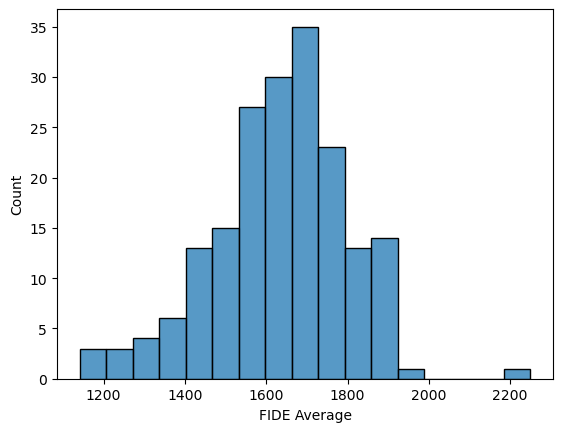

In [3]:
sns.histplot(data=stats, x = 'FIDE Average')
plt.show()

In [4]:
#holding off on this, Country might be a contributing variable, though likely a volatile one
stats_2 = stats.drop('Country', axis=1) 
stats_2

Num Players  Women  % of Women  FIDE Average  GMs  IMs   FMs  WGMs  \
index                                                                       
0            34497   5734       16.62          1666  236  522  1177    50   
1            32735   3581       10.94          1275   64  114    83     9   
2            26577   1751        6.59          1841   94  273   861    18   
3            25009   1430        5.72          1429   55  134   365     2   
4            23784   2143        9.01          1580   50  117   234     4   
...            ...    ...         ...           ...  ...  ...   ...   ...   
185              6      0        0.00          1820    0    0     0     0   
186              4      0        0.00          1749    0    0     0     0   
187              4      0        0.00          1556    0    0     0     0   
188              3      0        0.00          1878    0    0     1     0   
189              2      0        0.00          2250    0    0     1     0   

       WIMs  WFMs  Age Avg  
index                       
0       101   409       34  
1        41    42       27  
2        40    69       49  
3        14    37       42  
4        18    21       41  
...     ...   ...      ...  
185       0     0       31  
186       0     0       54  
187       0     0       38  
188       0     0       39  
189       0     0       59  

[188 rows x 11 columns]

In [5]:
corr = stats_2.corr()
corr

Num Players     Women  % of Women  FIDE Average       GMs  \
Num Players      1.000000  0.920168   -0.052895     -0.071449  0.783998   
Women            0.920168  1.000000    0.066081     -0.098209  0.840744   
% of Women      -0.052895  0.066081    1.000000     -0.236568  0.019255   
FIDE Average    -0.071449 -0.098209   -0.236568      1.000000  0.112279   
GMs              0.783998  0.840744    0.019255      0.112279  1.000000   
IMs              0.816500  0.847685   -0.015809      0.116148  0.971773   
FMs              0.800427  0.794101   -0.048592      0.131290  0.903984   
WGMs             0.652406  0.781504    0.118513      0.095681  0.933943   
WIMs             0.783620  0.879170    0.104776      0.069354  0.943228   
WFMs             0.663664  0.842623    0.096334      0.046138  0.857166   
Age Avg          0.044575 -0.078891   -0.576983      0.532940  0.046888   

                   IMs       FMs      WGMs      WIMs      WFMs   Age Avg  
Num Players   0.816500  0.800427  0.652406  0.783620  0.663664  0.044575  
Women         0.847685  0.794101  0.781504  0.879170  0.842623 -0.078891  
% of Women   -0.015809 -0.048592  0.118513  0.104776  0.096334 -0.576983  
FIDE Average  0.116148  0.131290  0.095681  0.069354  0.046138  0.532940  
GMs           0.971773  0.903984  0.933943  0.943228  0.857166  0.046888  
IMs           1.000000  0.957340  0.905017  0.939332  0.867504  0.096504  
FMs           0.957340  1.000000  0.831257  0.865272  0.845983  0.137924  
WGMs          0.905017  0.831257  1.000000  0.911112  0.863892 -0.038509  
WIMs          0.939332  0.865272  0.911112  1.000000  0.872647 -0.043599  
WFMs          0.867504  0.845983  0.863892  0.872647  1.000000 -0.041316  
Age Avg       0.096504  0.137924 -0.038509 -0.043599 -0.041316  1.000000

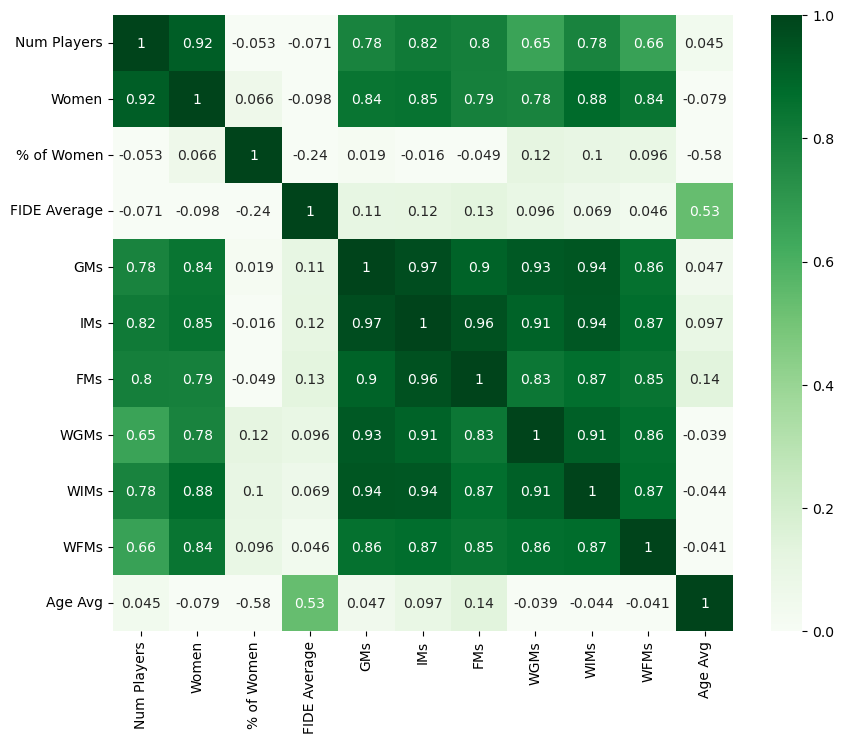

In [6]:
plt.figure(figsize=(10,8))

sns.heatmap(data=corr, cmap = 'Greens', annot=True, vmin=0)

plt.show()

C:\Users\joshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


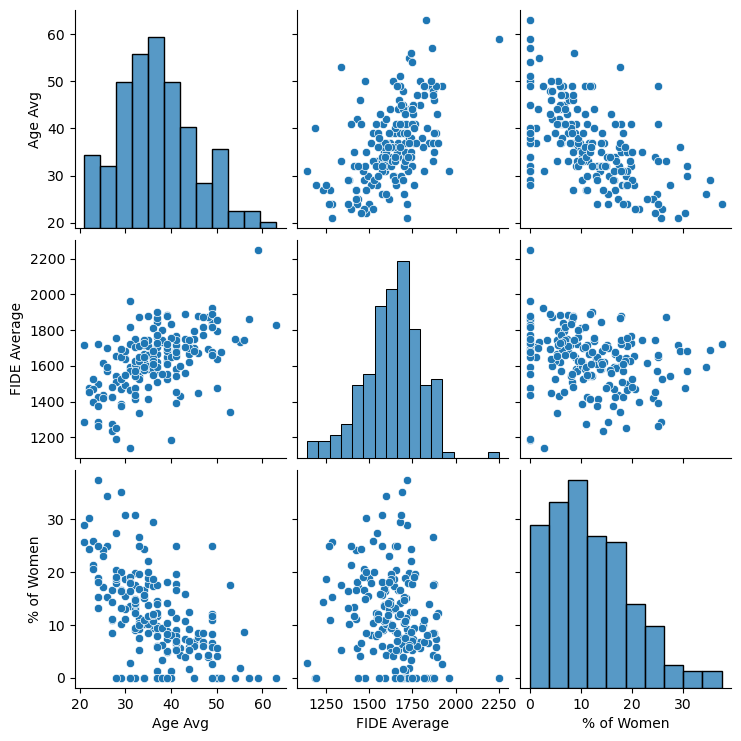

In [7]:
sns.pairplot(stats[['Age Avg', 'FIDE Average', '% of Women']])
plt.show()

In [8]:
games.columns

Index(['id', 'rated', 'created_at', 'duration', 'turns', 'victory_status',
       'winner', 'winner_bin', 'time_ctrl', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'rating_dif', 'moves',
       'opening_eco', 'opening_name', 'opening_moves', 'opening_10',
       'opening_ply'],
      dtype='object')

In [14]:
y = games['winner_bin']
X = games[['turns','white_rating','black_rating','rating_dif']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

In [15]:
X.describe()

const         turns  white_rating  black_rating    rating_dif
count  20058.0  20058.000000  20058.000000  20058.000000  20058.000000
mean       1.0     60.465999   1596.631868   1588.831987      7.799880
std        0.0     33.570585    291.253376    291.036126    249.036667
min        1.0      1.000000    784.000000    789.000000  -1605.000000
25%        1.0     37.000000   1398.000000   1391.000000   -108.000000
50%        1.0     55.000000   1567.000000   1562.000000      3.000000
75%        1.0     79.000000   1793.000000   1784.000000    122.000000
max        1.0    349.000000   2700.000000   2723.000000   1499.000000

In [16]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winner_bin   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     976.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:02:01   Log-Likelihood:                -13191.
No. Observations:               20058   AIC:                         2.639e+04
Df Residuals:                   20054   BIC:                         2.642e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5922      0.020     28.999   